In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with fits.open('NearbyClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas()
df_Alpha = df[(df['Cluster']=='alphaPer')]

In [3]:
df_Alpha.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)
df_Alpha_sorted = df_Alpha.copy()

<ipython-input-3-ede9c58dde25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alpha.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


In [4]:
df_Alpha_sorted.sort_values(by=['gmag'], inplace=True)

In [5]:
x = np.array(df_Alpha_sorted['gmag'])
y = np.array(df_Alpha_sorted['bpmag']- df_Alpha_sorted['rpmag'])
x_s1 = []
y_s1=[]
x_s2 = []
y_s2 = []
x_s3 = []
y_s3 = []
for i in range(len(x)):
    #if((15.5<=x[i]<=18.5 and y[i]<2.5)or (17.8<=x[i]<=18.5 and y[i]<=3)):
     #   x_s3.append(x[i])
      #  y_s3.append(y[i])
    if(6.5<=x[i]<=13):
    #if (13<=x[i]):
        x_s1.append(x[i])
        y_s1.append(y[i])
    elif(13<x[i]<=18):
        x_s2.append(x[i])
        y_s2.append(y[i])
    elif(x[i]<6.5):
        x_s3.append(x[i])
        y_s3.append(y[i])

In [6]:
PMS_x = [17.91471549, 17.86719849, 17.80695149, 17.74655049, 17.68587149,
       17.62484049, 17.56341449, 17.50129749, 17.43854849, 17.37506249,
       17.30841549, 17.22980249, 17.15069049, 17.05332349, 16.95322849,
       16.85281549, 16.75686449, 16.66139249, 16.57147449, 16.48509749,
       16.39900949, 16.31420249, 16.23104549, 16.14855849, 16.06875249,
       15.98873149, 15.91464049, 15.85054149, 15.80495049, 15.77205649,
       15.76513549, 15.75811149, 15.75107749, 15.74401449, 15.73703149,
       15.73021749, 15.72361649, 15.71334749, 15.69740149, 15.66922949,
       15.60979049, 15.53390549, 15.40832249, 15.26323549, 15.12682949,
       14.94460849, 14.77722349, 14.58971649, 14.39188649, 14.21928049,
       13.97191449, 13.81403749, 13.64600249, 13.46182849, 13.27141049,
       13.08224849, 12.88419849, 12.69427049, 12.51223849, 12.33640749,
       12.16549849, 11.99793049, 11.83454849, 11.70034249, 11.63201149,
       11.60445449, 11.58256149, 11.54359549, 11.47278549, 11.36372349]
PMS_y = [3.220234, 3.203553, 3.182694, 3.162027, 3.141467, 3.120954,
       3.10044 , 3.079776, 3.058945, 3.037915, 3.015298, 2.986156,
       2.957119, 2.918737, 2.879931, 2.841887, 2.80402 , 2.767456,
       2.731462, 2.696179, 2.661598, 2.628725, 2.597809, 2.567912,
       2.540201, 2.512479, 2.487058, 2.46518 , 2.449851, 2.439298,
       2.437347, 2.435299, 2.433176, 2.430926, 2.428575, 2.426117,
       2.423558, 2.419391, 2.412868, 2.402345, 2.38122 , 2.354964,
       2.313052, 2.265609, 2.221689, 2.163913, 2.111335, 2.053873,
       1.994109, 1.942379, 1.870021, 1.819169, 1.763363, 1.697859,
       1.628601, 1.560463, 1.487835, 1.42025 , 1.357659, 1.298793,
       1.24355 , 1.188506, 1.134516, 1.089465, 1.060834, 1.045992,
       1.034563, 1.021087, 1.004518, 0.981505]

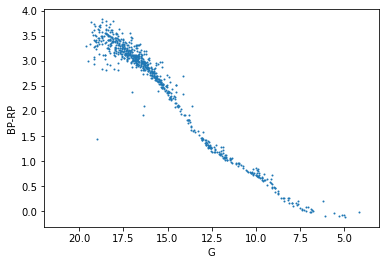

In [7]:
plt.scatter(x, y, s = 1)
#plt.plot(xs, model(xs), 'r', lw=1)
plt.xlim(22,3)
plt.xlabel('G')
plt.ylabel('BP-RP')
plt.show()

In [8]:
    # Extract the outliers
    outliers_5sigma = [] #outliers outside of the 2 sigma value
    y_5sigma = [] # corresponding bp-rp values
    outliers_2sigma = [] #outliers outside of the 1.5 sigma value
    y_2sigma = [] # corresponding bp-rp values

In [9]:
from scipy.interpolate import UnivariateSpline
def rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma):
    # get the difference between the values predicted by the model and the actual bp-rp values
    for j in range(20):
        diff = []
        model = UnivariateSpline(x_s1, y_s1, k=4)
        predicted = model(x_s1)
        #predicted = np.arange(len(x_s1), dtype=float)
        #for i in range(len(np.array(x_s1))):
         #   predicted[i] = predict(np.array(x_s1)[i])

        # get the difference between the values predicted by the model and the actual bp-rp values
        diff = y_s1 - predicted

        #get the standard deviation of the differences
        sigma = []
        precision = 10*(10**(-3))
        for n in range(len(x_s1)):
            if x_s1[n] <13:
                precision = 8*(10**(-3))
            elif x_s1[n] < 18:
                precision = 16*(10**(-3))
            else:
                precision = 200*(10**(-3))
            sigma.append(np.sqrt(2*precision**2))
        sigma = np.array(sigma)
        x_filtered = []
        y_filtered = []
        if j == 0:
            for k in range(len(diff)):
                if np.abs(diff[k]) >= 10*sigma[k]: #and 13<= x_s1[k]< 18:
                    outliers_5sigma.append(x_s1[k])
                    y_5sigma.append(y_s1[k])

                #elif diff[k] >= 2*sigma[k]:
                 #   outliers_2sigma.append(x_s1[k])
                  #  y_2sigma.append(y_s1[k])
                else:
                    x_filtered.append(x_s1[k])
                    y_filtered.append(y_s1[k])
            x_s1 = x_filtered
            y_s1 = y_filtered
        else:
            for k in range(len(diff)):
                if np.abs(diff[k]) >= 5*sigma[k]:
                    outliers_5sigma.append(x_s1[k])
                    y_5sigma.append(y_s1[k])

                #elif diff[k] >= 2*sigma[k]:
                 #   outliers_2sigma.append(x_s1[k])
                  #  y_2sigma.append(y_s1[k])
                else:
                    x_filtered.append(x_s1[k])
                    y_filtered.append(y_s1[k])
            x_s1 = x_filtered
            y_s1 = y_filtered
        
    return x_s1, y_s1,outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, model



In [10]:
x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, model = rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma)
x_s2, y_s2, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, model1 = rejection(x_s2, y_s2, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma)




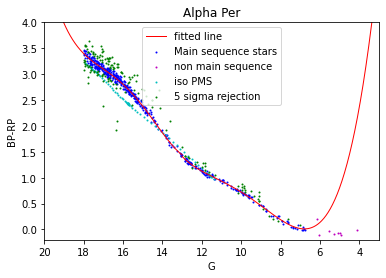

In [11]:
# plot the good values alongside the rejected values and the fitted line
plt.xlim(20,3)
plt.ylim(-0.2,4)
xs = np.linspace(3, 13, 1000)
xs1 = np.linspace(13,20,1000)
plt.plot(xs, model(xs), 'r', label = 'fitted line',lw=1)
plt.plot(xs1, model1(xs1), 'r', lw=1)
plt.scatter(x_s2, y_s2, c = 'b', label = 'Main sequence stars', s = 1)
plt.scatter(x_s1, y_s1, c = 'b', s = 1)
plt.scatter(x_s3, y_s3 , c = 'm', label = 'non main sequence', s = 1)
plt.scatter(PMS_x, PMS_y, c = 'c', label = 'iso PMS', s=1)
plt.scatter(outliers_5sigma, y_5sigma, c = 'g', label = '5 sigma rejection', s=1)
#plt.scatter(outliers_2sigma, y_2sigma, c = 'm',label = '2 sigma rejection', s=1)
plt.xlabel('G')
plt.ylabel('BP-RP')

#plt.plot(x_lin_reg1, y_lin_reg1, c = 'r', label='Fitted line1')
plt.title('Alpha Per')
plt.legend()
plt.show()

In [12]:
len(x_s1)

121

In [13]:
len(x_s2)

332